# SUMMARY
From https://www.ghsindex.org/about/

`The Global Health Security (GHS) Index is the first comprehensive assessment and benchmarking of health security and related capabilities across the 195 countries that make up the States Parties to the International Health Regulations (IHR [2005]). The GHS Index is a project of the Nuclear Threat Initiative (NTI) and the Johns Hopkins Center for Health Security (JHU) and was developed with The Economist Intelligence Unit (EIU). These organizations believe that, over time, the GHS Index will spur measurable changes in national health security and improve international capability to address one of the world’s most omnipresent risks: infectious disease outbreaks that can lead to international epidemics and pandemics.`

In this notebook we will attempt to compare GHS scores to how countries have been responding to and affacted by COVID-19.

In [171]:
import pandas as pd
import numpy as np

from matplotlib.pylab import plt
import matplotlib.colors as colors


import seaborn as sns

from scipy import stats

%matplotlib inline

sns.set_style("white")
sns.set_context('talk')

%matplotlib inline

# Setup

In [172]:
ghs_index_dataset = '../data/raw/ghsindex.csv'

## Load the GHS dataset

In [173]:
ghs = pd.DataFrame(
    pd.read_csv(ghs_index_dataset, index_col=0).to_records()).rename(
        columns={'Indicators': 'indicator'})

ghs.head(3)



,indicator,Weight,Source,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,OVERALL SCORE,NaN,-,32.3,52.9,23.6,30.5,25.2,29,58.6,...,77.9,83.5,41.3,34.3,26.1,23,49.1,18.5,28.7,38.2
1,1) PREVENTION OF THE EMERGENCE OR RELEASE OF P...,0.162562,-,23.5,43.8,25.7,27.9,24.0,17.8,41.4,...,68.3,83.1,44.0,42.6,24.5,23.5,49.5,15.1,24.5,31.4
2,1.1) Antimicrobial resistance (AMR),0.160920,-,16.7,33.3,33.3,0,0.0,50,83.3,...,100.0,83.3,75.0,66.7,50,25,66.7,0.0,33.3,50.0


### Simplify the questions

In [174]:
ghs['indicator'] = ghs['indicator'].map(lambda q: q.split(')')[0].replace('.',''))

ghs['indicator'] = np.where(ghs['indicator']=='OVERALL SCORE', 'score', ghs['indicator'])

ghs.head()

,indicator,Weight,Source,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,score,NaN,-,32.3,52.9,23.6,30.5,25.2,29,58.6,...,77.9,83.5,41.3,34.3,26.1,23,49.1,18.5,28.7,38.2
1,1,0.162562,-,23.5,43.8,25.7,27.9,24.0,17.8,41.4,...,68.3,83.1,44.0,42.6,24.5,23.5,49.5,15.1,24.5,31.4
2,11,0.160920,-,16.7,33.3,33.3,0,0.0,50,83.3,...,100.0,83.3,75.0,66.7,50,25,66.7,0.0,33.3,50.0
3,111,0.500000,-,33.3,16.7,16.7,0,0.0,0,66.7,...,100.0,66.7,50.0,33.3,0,0,83.3,0.0,66.7,50.0
4,111a,0.333333,1,50,0.0,0.0,0,0.0,0,100.0,...,100.0,100.0,100.0,0,0,0,100.0,0.0,100.0,100.0


### We want the scores by country

In [175]:
ghs = ghs.drop(columns=['Weight', 'Source'])

ghs.head()

,indicator,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,score,32.3,52.9,23.6,30.5,25.2,29,58.6,50.2,75.5,...,77.9,83.5,41.3,34.3,26.1,23,49.1,18.5,28.7,38.2
1,1,23.5,43.8,25.7,27.9,24.0,17.8,41.4,56.7,68.9,...,68.3,83.1,44.0,42.6,24.5,23.5,49.5,15.1,24.5,31.4
2,11,16.7,33.3,33.3,0,0.0,50,83.3,41.7,83.3,...,100.0,83.3,75.0,66.7,50,25,66.7,0.0,33.3,50.0
3,111,33.3,16.7,16.7,0,0.0,0,66.7,33.3,66.7,...,100.0,66.7,50.0,33.3,0,0,83.3,0.0,66.7,50.0
4,111a,50,0.0,0.0,0,0.0,0,100.0,50.0,100.0,...,100.0,100.0,100.0,0,0,0,100.0,0.0,100.0,100.0


In [176]:
ghs = ghs.set_index('indicator').T
ghs.head()

indicator,score,1,11,111,111a,111b,111c,112,112a,112b,...,BG1,BG2,BG3,BG4,BG5,BG6,BG7,BG8,BG9,BG10
Afghanistan,32.3,23.5,16.7,33.3,50,50,0,0,0,0,...,20,550,36.4,0.5,3,0.3,1.4,16,0.4,46.2
Albania,52.9,43.8,33.3,16.7,0,50,0,50,100,0,...,15,5195,2.9,0.8,6,0.7,3.2,36,0.6,68.9
Algeria,23.6,25.7,33.3,16.7,0,50,0,50,100,0,...,175,4155,42.1,0.8,3.5,0.2,2.8,35,0.5,67.9
Andorra,30.5,27.9,0,0,0,0,0,0,0,0,...,3,39147,0.1,0.9,-,0.6,-,-,-,-
Angola,25.2,24,0,0,0,0,0,0,0,0,...,99,3207,30.8,0.6,3.6,0.4,3,19,0.4,49.6


In [314]:
ghs.T.filter(like='United')

,United Arab Emirates,United Kingdom,United States
indicator,,,
score,46.7,77.9,83.5
1,49.3,68.3,83.1
11,83.3,100,83.3
111,66.7,100,66.7
111a,100,100,100
...,...,...,...
BG6,0.9,1,1
BG7,3.2,3.2,2.6
BG8,70,80,71


## Load the COVID dataset

In [177]:
ecdc_dataset_processed = '../data/processed/ecdc_dataset.csv'

In [316]:
ecdc = pd.read_csv(ecdc_dataset_processed)

ecdc['country'] = ecdc['country'].map(lambda c: c.replace('_', ' '))  # To align country names

# And some fixed for specific countrys
country_mappings = {
    'United States of America': 'United States',
}

for ecdc_name, ghs_name in country_mappings.items():
    ecdc['country'] = np.where(ecdc['country']==ecdc_name, ghs_name, ecdc['country'])



# The GHS Index

In [317]:
prevention = ghs.filter(regex='^1').applymap(lambda v: float(v)).rename(columns={'1': 'score'})['score']
detection = ghs.filter(regex='^2').applymap(lambda v: float(v)).rename(columns={'2': 'score'})['score']
response = ghs.filter(regex='^3').applymap(lambda v: float(v)).rename(columns={'3': 'score'})['score']
system = ghs.filter(regex='^4').applymap(lambda v: float(v)).rename(columns={'4': 'score'})['score']
commitment = ghs.filter(regex='^5').applymap(lambda v: float(v)).rename(columns={'5': 'score'})['score']
risk = ghs.filter(regex='^6').applymap(lambda v: float(v)).rename(columns={'6': 'score'})['score']

ghs_scores = pd.DataFrame({
    'overall': ghs['score'].map(lambda v: float(v)),
    'prevention': prevention,
    'detection': detection,
    'response': response,
    'system': system,
    'commitment': committment,
    'risk': risk
})

ghs_scores.head()

,overall,prevention,detection,response,system,commitment,risk
Afghanistan,32.3,23.5,44.8,23.6,21.0,56.3,23.3
Albania,52.9,43.8,74.3,52.0,35.9,53.0,55.7
Algeria,23.6,25.7,12.0,19.6,13.1,29.1,51.4
Andorra,30.5,27.9,14.2,30.5,9.2,32.4,83.5
Angola,25.2,24.0,17.9,21.7,10.9,41.4,42.2


In [318]:
ghs_scores.sort_values(by='overall')

,overall,prevention,detection,response,system,commitment,risk
Equatorial Guinea,16.2,1.9,4.4,17.6,5.0,33.5,43.6
Somalia,16.6,15.8,21.5,17.4,0.3,28.5,15.9
North Korea,17.5,19.0,7.0,11.3,12.2,27.3,35.6
São Tomé and Príncipe,17.7,8.2,2.7,18.7,7.2,33.5,44.6
Marshall Islands,18.2,7.0,4.4,18.1,7.2,30.7,52.3
...,...,...,...,...,...,...,...
Canada,75.3,70.0,96.4,60.7,67.7,74.7,82.7
Australia,75.5,68.9,97.3,65.9,63.5,77.0,79.4
Netherlands,75.6,73.7,86.0,79.1,70.2,61.1,81.7
United Kingdom,77.9,68.3,87.3,91.9,59.8,81.2,74.7


In [319]:
ghs_scores.rank(ascending=False).sort_values(by='overall')

,overall,prevention,detection,response,system,commitment,risk
United States,1.0,1.0,1.0,2.0,1.0,1.0,19.5
United Kingdom,2.0,10.0,6.0,1.0,11.0,2.0,26.0
Netherlands,3.0,4.0,8.0,4.0,3.0,32.5,12.0
Australia,4.0,8.0,2.5,10.0,6.0,3.0,18.0
Canada,5.0,7.0,4.0,17.0,4.0,5.0,10.0
...,...,...,...,...,...,...,...
Marshall Islands,191.0,194.0,191.0,189.0,183.5,179.5,112.0
São Tomé and Príncipe,192.0,192.5,194.5,186.5,183.5,168.0,139.0
North Korea,193.0,164.0,186.0,195.0,145.0,191.0,172.0
Somalia,194.0,174.0,153.0,193.0,195.0,188.0,195.0


# Join GHS and ECDC Dataset

In [353]:
df = ecdc\
    .sort_values(by='day', ascending=False)\
    .groupby('country').first()\
    .join(ghs_scores, how='inner')

df.shape

(158, 25)

In [354]:
df = df[df['cum_cases']>100]
df.shape

(86, 25)

In [355]:
df[['cum_cases_log10', 'overall']].corr(method='pearson')

,cum_cases_log10,overall
cum_cases_log10,1.000000,0.610714
overall,0.610714,1.000000


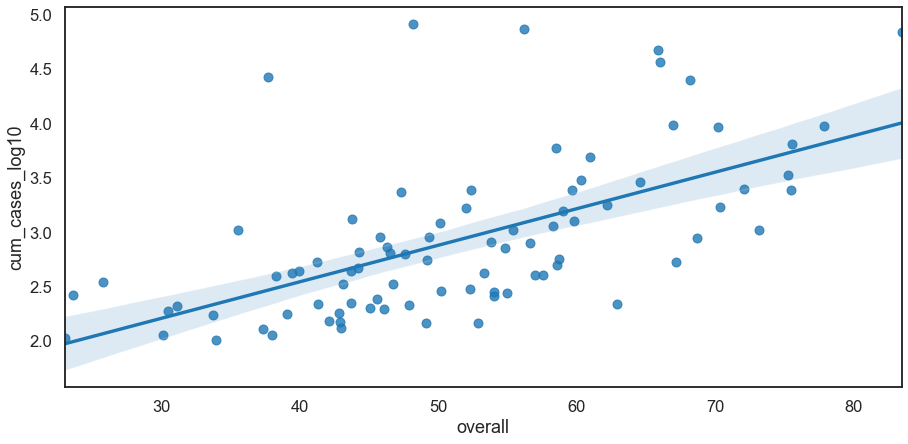

In [356]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.regplot(df['overall'], df['cum_cases_log10'], ax=ax)
# ax.scatter(df['prevention'], df['cum_cases_log10'])
# ax.scatter(df['detection'], df['cum_cases_log10'])
# ax.scatter(df['system'], df['cum_cases_log10'])
# ax.scatter(df['risk'], df['cum_cases_log10'])

overall
0.0       204.333333
33.0     4311.954545
66.0    12737.571429
Name: cum_cases, dtype: float64

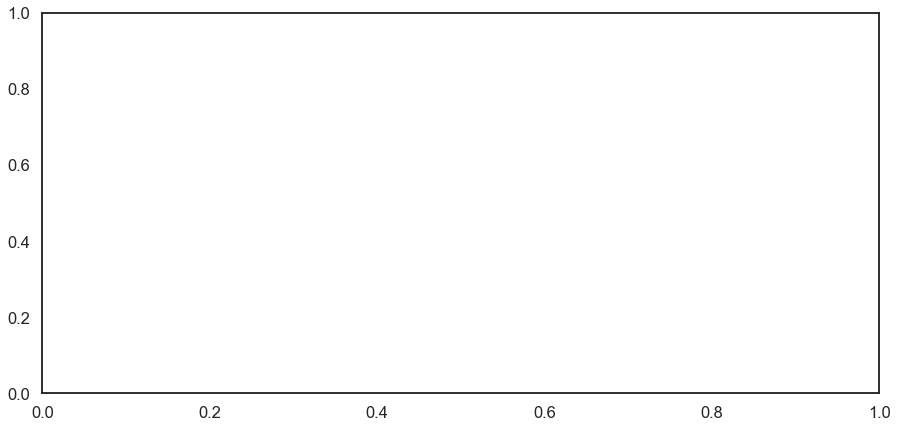

In [358]:
fig, ax = plt.subplots(figsize=(15, 7))

df.groupby(df['overall']//33*33)['cum_cases'].mean()

In [347]:
df.sort_values(by='overall', ascending=False).tail(50)[['cum_cases', 'overall']].corr(method='spearman')

,cum_cases,overall
cum_cases,1.000000,0.379454
overall,0.379454,1.000000


In [303]:
df[['cum_cases', 'overall']].corr()

,cum_cases,overall
cum_cases,1.000000,0.260606
overall,0.260606,1.000000


In [304]:
df[['cum_cases', 'prevention']].corr()

,cum_cases,prevention
cum_cases,1.000000,0.229402
prevention,0.229402,1.000000


In [305]:
df[['cum_cases', 'detection']].corr()

,cum_cases,detection
cum_cases,1.000000,0.234851
detection,0.234851,1.000000


In [306]:
df[['cum_cases', 'response']].corr()

,cum_cases,response
cum_cases,1.000000,0.214687
response,0.214687,1.000000


In [307]:
df[['cum_cases', 'risk']].corr()

,cum_cases,risk
cum_cases,1.000000,0.205907
risk,0.205907,1.000000


In [242]:

df['score'] = df['score'].map(lambda v: float(v))

df[df['pop']>20000000].corr(), df[df['pop']>20000000].corr(method='spearman'), 

(            cum_deaths     score       pop
 cum_deaths    1.000000  0.183590  0.200687
 score         0.183590  1.000000  0.031564
 pop           0.200687  0.031564  1.000000,
             cum_deaths     score       pop
 cum_deaths    1.000000  0.548469  0.407896
 score         0.548469  1.000000  0.333273
 pop           0.407896  0.333273  1.000000)

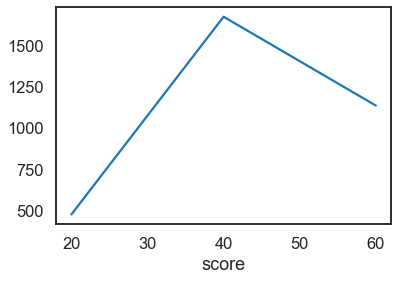

In [243]:
df[df['pop']>20000000].groupby(df[df['pop']>20000000]['score']//20*20)['cum_deaths'].std().plot()

In [235]:
ghs.sort_values('score')

indicator,score,1,11,111,111a,111b,111c,112,112a,112b,...,BG1,BG2,BG3,BG4,BG5,BG6,BG7,BG8,BG9,BG10
Afghanistan,32.3,23.5,16.7,33.3,50,50,0,0,0,0,...,20,550,36.4,0.5,3,0.3,1.4,16,0.4,46.2
Albania,52.9,43.8,33.3,16.7,0,50,0,50,100,0,...,15,5195,2.9,0.8,6,0.7,3.2,36,0.6,68.9
Algeria,23.6,25.7,33.3,16.7,0,50,0,50,100,0,...,175,4155,42.1,0.8,3.5,0.2,2.8,35,0.5,67.9
Andorra,30.5,27.9,0,0,0,0,0,0,0,0,...,3,39147,0.1,0.9,-,0.6,-,-,-,-
Angola,25.2,24,0,0,0,0,0,0,0,0,...,99,3207,30.8,0.6,3.6,0.4,3,19,0.4,49.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,23,23.5,25,0,0,0,0,50,100,0,...,179,6281,28.5,0.8,3.2,0.4,2.3,18,-,64
Vietnam,49.1,49.5,66.7,83.3,100,50,100,50,100,0,...,241,2493,96.5,0.7,3.1,0.7,3.1,33,0.7,69.7
Yemen,18.5,15.1,0,0,0,0,0,0,0,0,...,17,591,28.5,0.5,2,0.1,1.6,14,0.4,45.7
Zambia,28.7,24.5,33.3,66.7,100,100,0,0,0,0,...,27,1516,17.6,0.6,5.6,0.5,3.2,35,0.4,53.1


In [227]:
df.groupby(df['score']//20*20).size()

score
0.0      3
20.0    70
40.0    65
60.0    19
dtype: int64

In [16]:
df.head()

,Weight,Source,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
score,NaN,-,32.3,52.9,23.6,30.5,25.2,29,58.6,50.2,...,77.9,83.5,41.3,34.3,26.1,23,49.1,18.5,28.7,38.2
1) PREVENTION OF THE EMERGENCE OR RELEASE OF PATHOGENS,0.162562,-,23.5,43.8,25.7,27.9,24.0,17.8,41.4,56.7,...,68.3,83.1,44.0,42.6,24.5,23.5,49.5,15.1,24.5,31.4
11) Antimicrobial resistance,0.160920,-,16.7,33.3,33.3,0,0.0,50,83.3,41.7,...,100.0,83.3,75.0,66.7,50,25,66.7,0.0,33.3,50.0
"111) AMR surveillance, detection and reporting",0.500000,-,33.3,16.7,16.7,0,0.0,0,66.7,33.3,...,100.0,66.7,50.0,33.3,0,0,83.3,0.0,66.7,50.0
111a) National plan for AMR priority pathogens,0.333333,1,50,0.0,0.0,0,0.0,0,100.0,50.0,...,100.0,100.0,100.0,0,0,0,100.0,0.0,100.0,100.0


# Calculate Relative Numbers of Confirmed Cases & Deaths
We calculate the relative numbers of cases or deaths with respect to some baseline (China) at the same point in their outbreak.
For confimed cases we use the number of days beyond the 100th case (in the column `day_100`) and for deaths we use the number of days neyond the 10th deaths (in the columns `day_10`).

In [5]:
def rel_num_by_day_for_countries(df, cum_col = 'cum_cases', day_col='day_zero_cases', baseline_country='China'):
    
    # Foucs on the countries about critical cases/deaths
    df_from_day_zero = df[df[day_col]>0]
    
    # The baseline numbers.
    baseline_nums = df_from_day_zero.set_index('country').loc[baseline_country].set_index(day_col)
    
    return df_from_day_zero.groupby('country').apply(
        lambda g: g.set_index(day_col)[cum_col]/baseline_nums[cum_col]).T

In [6]:
rel_deaths_by_day = rel_num_by_day_for_countries(df, cum_col = 'cum_deaths', day_col='day_zero_deaths', baseline_country='China')
rel_cases_by_day = rel_num_by_day_for_countries(df, cum_col = 'cum_cases', day_col='day_zero_cases', baseline_country='China')

rel_deaths_by_day.shape, rel_cases_by_day.shape

((64, 33), (67, 87))

In [7]:
rel_deaths_by_day

country,Algeria,Austria,Belgium,Brazil,Canada,China,Denmark,Ecuador,Egypt,France,...,Portugal,Romania,San_Marino,South_Korea,Spain,Sweden,Switzerland,Turkey,United_Kingdom,United_States_of_America
day_zero_deaths,,,,,,,,,,,,,,,,,,,,,
1.0,0.588235,1.470588,1.235294,1.058824,0.705882,1.0,0.764706,1.058824,0.823529,1.117647,...,0.823529,0.764706,0.823529,0.705882,2.058824,0.588235,0.764706,1.764706,0.588235,0.705882
2.0,0.576923,1.153846,1.423077,0.961538,0.500000,1.0,0.923077,1.038462,0.730769,1.153846,...,0.884615,NaN,0.538462,0.500000,1.807692,0.615385,0.538462,1.423077,0.807692,0.538462
3.0,0.414634,0.829268,1.634146,0.829268,0.439024,1.0,0.780488,0.707317,0.512195,0.804878,...,0.804878,NaN,0.341463,0.390244,2.048780,0.487805,0.463415,1.073171,0.853659,0.414634
4.0,0.303571,NaN,1.339286,0.821429,0.428571,1.0,0.607143,NaN,NaN,0.857143,...,0.767857,NaN,0.357143,0.303571,2.160714,0.375000,0.375000,1.053571,0.982143,0.375000
5.0,0.209877,NaN,1.086420,0.703704,0.333333,1.0,NaN,NaN,NaN,0.753086,...,NaN,NaN,0.246914,0.271605,1.679012,0.308642,0.407407,NaN,0.740741,0.320988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# def plot_simple_rel_nums_for_country(ax, s):
    
#     if len(s)>1:
        
#         order = 1 if len(s)<10 else 2  # A bit arbitrary, but we need to set the order of teh curve-fit
        
#         x, y = s.index.values, s.values  # The x and y values to plot
#         sns.regplot(x, y, ax=ax, order=order, truncate=True, ci=False, scatter=False, line_kws={'lw':2, 'color': 'gainsboro'})
    
    
def plot_simple_rel_nums_for_country(ax, s):

    x, y = s.index.values, s.values
    ax.plot(x, y, lw=2, c='gainsboro')
    
    
def plot_rel_nums_for_country(ax, s, colour_dict):
    
    country = s.name                                 # Name of the country
    rgb_colour = colour_dict[country]
    hex_colour = colors.rgb2hex(rgb_colour)
        
    x, y = s.index.values, s.values  # The x and y values to plot
    
#     sns.regplot(
#         x, y, ax=ax, order=2, truncate=True, ci=False,
#         scatter_kws = {'marker': 'o', 's': 6, 'color': hex_colour},
#         line_kws = {'lw': .75, 'color': hex_colour}
#     )
    
    ax.plot(x, y, c=rgb_colour, lw=.75, marker='o', markersize=9, markerfacecolor='none', markeredgewidth=.5)
    
    # For decoration
    ax.plot(x, y, c=rgb_colour, lw=0, marker='o', markersize=2)
    
    # Annotate
    ax.plot([x[-1]], [y[-1]], marker='o', markersize=10, markerfacecolor='none', markeredgewidth=2, c=rgb_colour)
    ax.annotate(country.replace('_', ' '), xy=(x[-1]+.5, y[-1]), fontsize=9)
    




In [205]:
highlight_countries = [
    'Ireland', 'United_Kingdom', 'Italy', 'Spain', 'France', 'Germany', 
    'United_States_of_America', 'Canada', 'Japan', 'Singapore', 'South_Korea',
    'Iran'
]

In [206]:

def plot_rel_nums_for_countries(ax, df, day_col='day_zero_cases', cum_col='cum_cases_log10', countries=[], baseline_country='China', max_days=60):
    
    # Set up the colours.
    colours = plt.cm.tab20(np.linspace(0,1,20))
    colour_dict = dict(zip(countries, colours))

    # Generate the relative values vs the baseline
    rel_nums_by_day = rel_num_by_day_for_countries(df, cum_col, day_col, baseline_country)
    
    highlight_countries = set(rel_nums_by_day.columns).intersection(countries)
    background_countries = set(rel_nums_by_day.columns).difference(countries+[baseline_country])

    # Plot the simple version for all countries a background to the main graph.
    rel_nums_by_day[background_countries].apply(lambda s: plot_simple_rel_nums_for_country(ax, s.dropna()))
    rel_nums_by_day[highlight_countries].apply(lambda s: plot_rel_nums_for_country(ax, s.dropna(), colour_dict))
    
    # Plot the baseline
    ax.axhline(1, c='k', ls='--', lw=1)
    ax.annotate(baseline_country, xy=(max_days-3, 1.01), fontsize=12)
    
    ax.set_xlim(1, max_days)
    


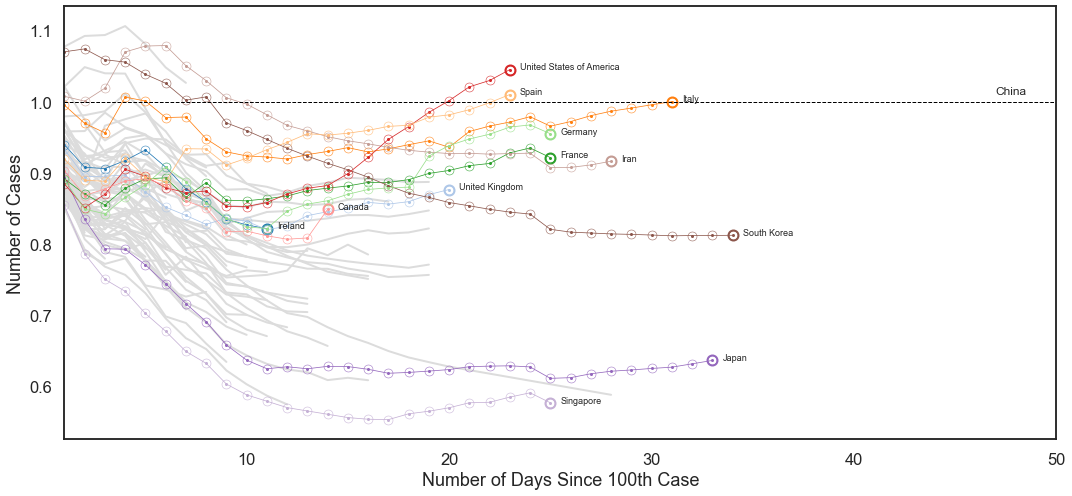

In [207]:
fig, ax = plt.subplots(figsize=(15, 7))

max_days = 50

plot_rel_nums_for_countries(ax, df, day_col='day_zero_cases', cum_col='cum_cases_log10', countries=highlight_countries, max_days=max_days)

ax.set_xlabel('Number of Days Since 100th Case')
ax.set_ylabel('Number of Cases')

fig.tight_layout()

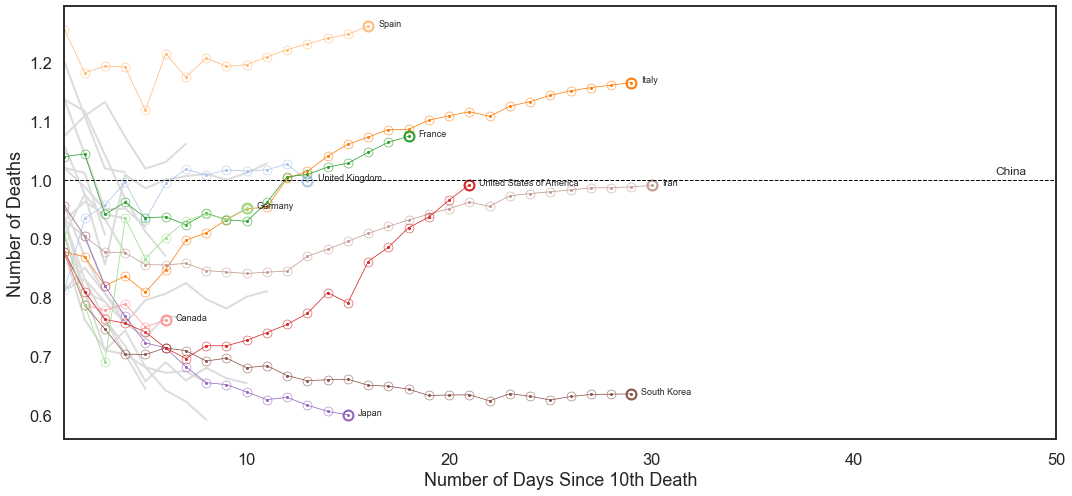

In [208]:
fig, ax = plt.subplots(figsize=(15, 7))

max_days = 50

plot_rel_nums_for_countries(ax, df, day_col='day_zero_deaths', cum_col='cum_deaths_log10', countries=highlight_countries, max_days=max_days)

ax.set_xlabel('Number of Days Since 10th Death')
ax.set_ylabel('Number of Deaths')

fig.tight_layout()

In [127]:
rel_cases_by_day

country,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Bahrain,Belgium,Bosnia_and_Herzegovina,...,Switzerland,Taiwan,Thailand,Tunisia,Turkey,United_Arab_Emirates,United_Kingdom,United_States_of_America,Uruguay,Vietnam
day_zero_cases,,,,,,,,,,,,,,,,,,,,,
1.0,0.523404,0.804255,0.565957,0.672340,0.519149,0.476596,0.557447,0.468085,0.719149,0.548936,...,1.123404,0.459574,0.753191,0.73617,1.527660,0.480851,0.693617,0.531915,0.574468,0.523404
2.0,0.378238,0.598446,0.424870,0.582902,0.352332,0.326425,0.471503,0.419689,0.518135,0.419689,...,0.860104,0.349741,0.458549,NaN,1.735751,0.362694,0.533679,0.411917,0.409326,0.347150
3.0,NaN,0.501901,0.357414,0.505703,0.304183,0.296578,0.467681,0.307985,0.454373,0.344106,...,0.711027,0.290875,0.336502,NaN,1.800380,0.266160,0.519011,0.442966,0.307985,0.281369
4.0,NaN,NaN,NaN,0.483146,0.304976,0.316212,0.579454,0.337079,0.428571,NaN,...,0.786517,0.264848,0.340289,NaN,1.983949,0.245586,0.515249,0.542536,0.303371,NaN
5.0,NaN,NaN,NaN,0.438776,0.219955,0.282313,0.571429,0.239229,0.356009,NaN,...,0.727891,0.221088,0.414966,NaN,1.733560,0.173469,0.422902,0.490930,0.246032,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def plot_rel_nums_for_country(ax, c, colour_dict, label_offset=0.25):
        
    country = c.name                 # Name of the country
    colour = colour_dict[country]    # The corresponding colour
    
    x, y = c.index.values, c.values  # The x and y values to plot
    
    # Scatter plot for the country.
    line = ax.plot(x, y, c=colour, lw=0, marker='o', markersize=8, markerfacecolor='none', markeredgewidth=.25)[0]
    ax.plot(x, y, c=colour, lw=0, marker='o', markersize=1)

    
    # Regression line params
    slope, intercept, _, _, _ = stats.linregress(x, y)
    
    # Plot the regression line
    yy = (x*slope)+intercept
    ax.plot(x, yy, c=colour, ls='-', lw=1)
    
    # Annotate lines
    xy = (x[-1]+label_offset, ((x[-1]+label_offset)*slope)+intercept)
    ax.annotate(country, xy=xy, fontsize='xx-large')
    
    return ax

In [9]:
def plot_rel_nums_for_country(ax, c, colour_dict, label_offset=0.5):
    
    country = c.name                 # Name of the country
    colour = colour_dict[country]    # The corresponding colour
    
    x, y = c.index.values, c.values  # The x and y values to plot
    
    sns.regplot(
        x, y, ax=ax, order=2, truncate=True, ci=False, scatter=True,
        scatter_kws = {'marker': 'o', 's': 8, 'color': colour},
        line_kws = {'lw': .66, 'color': colour}
    )
    

    # For decoration
    ax.plot(x, y, c=colour, lw=0, marker='o', markersize=10, markerfacecolor='none', markeredgewidth=.25)

    # Annotate lines
    xy = (x[-1]+label_offset, y[-1])
    ax.annotate(country, xy=xy, fontsize='x-large')
    



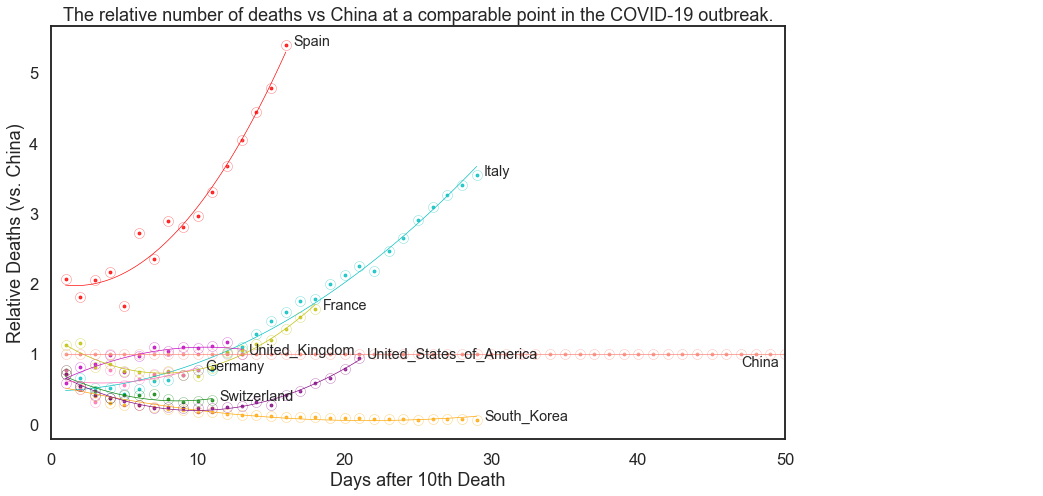

In [10]:
fig, ax = plt.subplots(figsize=(15, 7))

use_countries = set(['China', 'Spain', 'France', 'Switzerland', 'Germany', 'Italy', 'United_Kingdom', 'South_Korea', 'Ireland', 'United_States_of_America'])
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'orange', 'purple', 'salmon', 'hotpink', 'peru', 'grey']
colour_dict = dict(zip(use_countries, colours))

def plot_rel_deaths(ax, df, use_countries, colour_dict):
    
    rel_deaths_by_day = rel_num_by_day_for_countries(df, cum_col = 'cum_deaths', day_col='day_zero_deaths', baseline_country='China')

    available_countries = use_countries.intersection(rel_deaths_by_day.columns)
    rel_deaths_by_day[available_countries].apply(lambda c: plot_rel_nums_for_country(ax, c.dropna(), colour_dict))

    ax.set_xlabel('Days after 10th Death')
    ax.set_ylabel('Relative Deaths (vs. China)')
    ax.set_title('The relative number of deaths vs China at a comparable point in the COVID-19 outbreak.')

plot_rel_deaths(ax, df, use_countries, colour_dict)

ax.set_xlim(0, 50)

ax.annotate("China", xy=(47, .82), fontsize='x-large', annotation_clip=False)
# ax.annotate("@barrysmyth using data from https://github.com/CSSEGISandData/COVID-19", xy=(30, 4.2), fontsize='small', annotation_clip=False)

plt.tight_layout()

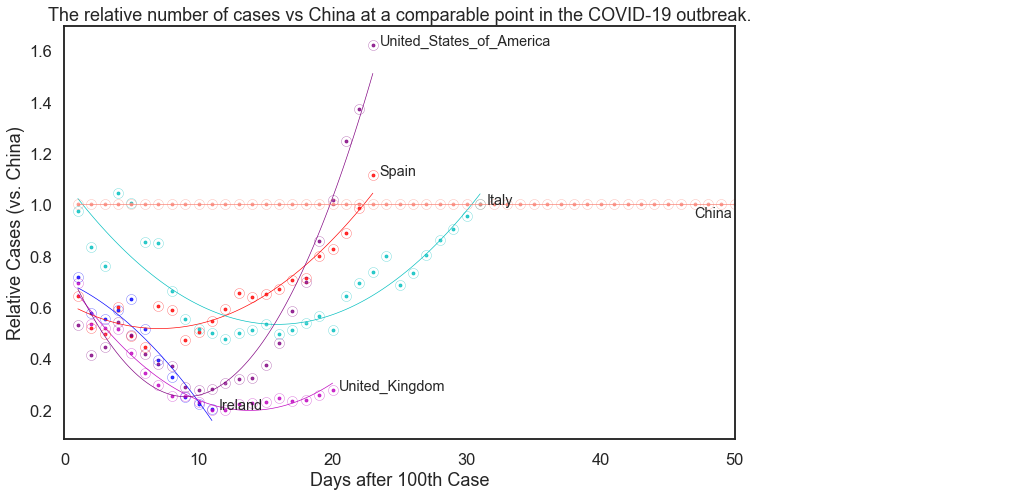

In [11]:
fig, ax = plt.subplots(figsize=(15, 7))

use_countries = set(['China', 'Spain', 'Italy', 'United_Kingdom', 'Ireland', 'United_States_of_America'])


def plot_rel_cases(ax, df, use_countries, colour_dict):
    
    rel_cases_by_day = rel_num_by_day_for_countries(df, cum_col = 'cum_cases', day_col='day_zero_cases', baseline_country='China')

    # Just for the highlighted countries
    available_countries = use_countries.intersection(rel_cases_by_day.columns)
    rel_cases_by_day[available_countries].apply(lambda c: plot_rel_nums_for_country(ax, c.dropna(), colour_dict))

    ax.set_xlabel('Days after 100th Case')
    ax.set_ylabel('Relative Cases (vs. China)')
    ax.set_title('The relative number of cases vs China at a comparable point in the COVID-19 outbreak.')

plot_rel_cases(ax, df, use_countries, colour_dict)

ax.set_xlim(0, 50)
ax.annotate("China", xy=(47, .95), fontsize='x-large', annotation_clip=False)
# ax.annotate("@barrysmyth using data from https://github.com/CSSEGISandData/COVID-19", xy=(30, 0.02), fontsize='small', annotation_clip=False)

plt.tight_layout()

# Top n Countries by Deaths

In [12]:
n = 10

top_n_countries_by_deaths = set(df.groupby('country')['cum_deaths'].max().sort_values(ascending=False).head(n).index.values)
longest_n_countries_by_confirmed = set(df.groupby('country')['day_zero_cases'].apply(lambda g: len(g[g>0])).sort_values(ascending=False).head(n).index.values)

top_n_colour_dict = dict(zip(top_n_countries_by_deaths, colours))
longest_n_colour_dict = dict(zip(longest_n_countries_by_confirmed, colours))

top_n_countries_by_deaths, longest_n_countries_by_confirmed

({'Belgium',
  'China',
  'France',
  'Germany',
  'Iran',
  'Italy',
  'Netherlands',
  'Spain',
  'United_Kingdom',
  'United_States_of_America'},
 {'China',
  'France',
  'Germany',
  'Iran',
  'Italy',
  'Japan',
  'Singapore',
  'South_Korea',
  'Spain',
  'United_States_of_America'})

/Users/barrysmyth/anaconda/envs/dash/lib/python3.7/site-packages/seaborn/algorithms.py:86: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/Users/barrysmyth/anaconda/envs/dash/lib/python3.7/site-packages/seaborn/algorithms.py:86: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/Users/barrysmyth/anaconda/envs/dash/lib/python3.7/site-packages/seaborn/algorithms.py:86: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/Users/barrysmyth/anaconda/envs/dash/lib/python3.7/site-packages/seaborn/algorithms.py:86: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


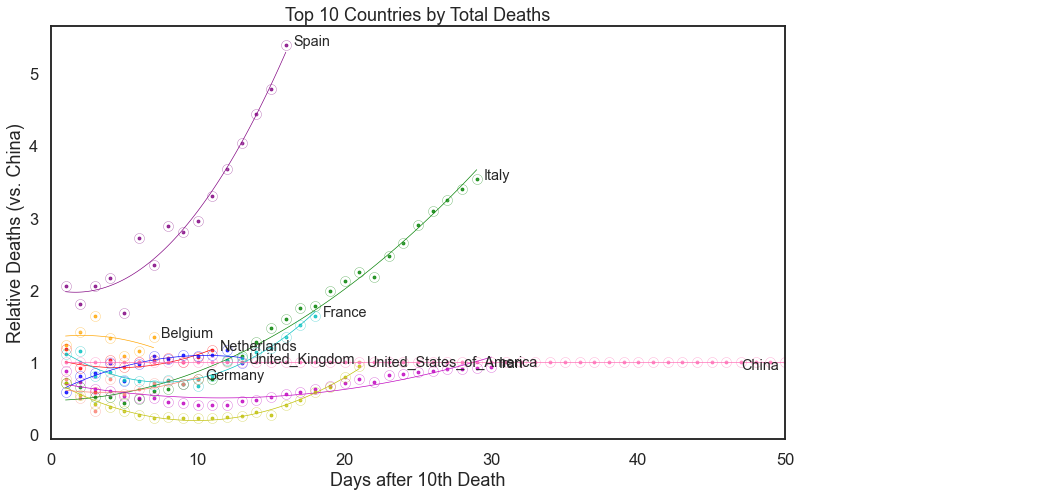

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))

plot_rel_deaths(ax, df, top_n_countries_by_deaths, top_n_colour_dict)

ax.set_xlim(0, 50)
ax.annotate("China", xy=(47, .9), fontsize='x-large', annotation_clip=False)
# ax.annotate("@barrysmyth using data from https://github.com/CSSEGISandData/COVID-19", xy=(31, 2.95), fontsize='small', annotation_clip=False)

ax.set_title('Top 10 Countries by Total Deaths')
plt.tight_layout()

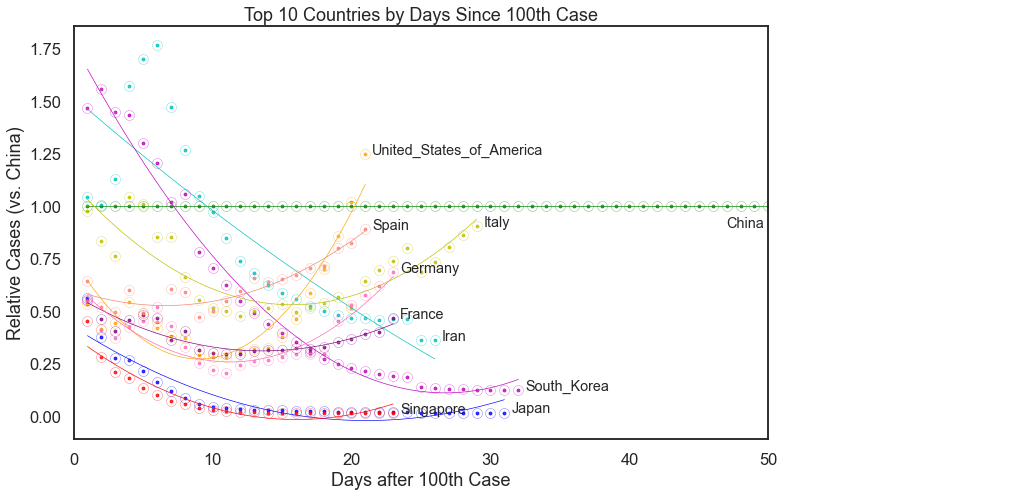

In [42]:
fig, ax = plt.subplots(figsize=(15, 7))

plot_rel_cases(ax, df, longest_n_countries_by_confirmed, longest_n_colour_dict)

ax.set_xlim(0, 50)
ax.annotate("China", xy=(47, .9), fontsize='x-large', annotation_clip=False)
# ax.annotate("@barrysmyth using data from https://github.com/CSSEGISandData/COVID-19", xy=(31, 2.95), fontsize='small', annotation_clip=False)

ax.set_title('Top 10 Countries by Days Since 100th Case')
plt.tight_layout()

In [49]:
df.set_index(['country', 'day_zero_cases']).loc['Ireland'].loc[0:]['cum_cases']

day_zero_cases
0.0     129
1.0     169
2.0     223
3.0     292
4.0     366
5.0     557
6.0     683
7.0     785
8.0     906
9.0    1125
Name: cum_cases, dtype: int64

In [50]:
df.set_index(['country', 'day_zero_cases']).loc['United_Kingdom'].loc[0:]['cum_cases']

day_zero_cases
0.0      115
1.0      163
2.0      206
3.0      273
4.0      321
5.0      373
6.0      456
7.0      590
8.0      707
9.0     1140
10.0    1391
11.0    1543
12.0    1950
13.0    2630
14.0    3277
15.0    3983
16.0    5018
17.0    5683
18.0    6650
Name: cum_cases, dtype: int64